In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

In [5]:
!mkdir data

In [6]:
file_id = '1gCZjz53RHvEvkrLjyTiPfEjotJHiaqtB'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data/dayofweek.csv')

In [7]:
df = pd.read_csv('data/dayofweek.csv')

In [8]:
df.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,uid_user_18,uid_user_19,uid_user_2,uid_user_20,uid_user_21,uid_user_22,uid_user_23,uid_user_24,uid_user_25,uid_user_26,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8,labname_code_rvw,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,-0.788667,-2.562352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
1,-0.756764,-2.562352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
2,-0.724861,-2.562352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
3,-0.692958,-2.562352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
4,-0.661055,-2.562352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4


In [9]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

In [11]:
np.asarray(np.unique(y_train, return_counts=True)).T

array([[  0, 105],
       [  1, 222],
       [  2, 125],
       [  3, 313],
       [  4,  80],
       [  5, 216],
       [  6, 287]])

In [12]:
np.asarray(np.unique(y_test, return_counts=True)).T

array([[ 0, 31],
       [ 1, 52],
       [ 2, 24],
       [ 3, 83],
       [ 4, 24],
       [ 5, 55],
       [ 6, 69]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21, stratify=y)

In [14]:
np.asarray(np.unique(y_train, return_counts=True)).T

array([[  0, 109],
       [  1, 219],
       [  2, 119],
       [  3, 316],
       [  4,  83],
       [  5, 217],
       [  6, 285]])

In [15]:
np.asarray(np.unique(y_test, return_counts=True)).T

array([[ 0, 27],
       [ 1, 55],
       [ 2, 30],
       [ 3, 80],
       [ 4, 21],
       [ 5, 54],
       [ 6, 71]])

In [16]:
def plot_feature_importances(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8))
    coefs /= coefs.sum()
    indices = coefs.argsort()[::-1][:n]
    ax.barh(np.arange(n), coefs[indices], color='mediumslateblue')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

In [17]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)

In [18]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.6272189349112426

In [21]:
svc = SVC(kernel='poly', probability=True, random_state=21)

In [22]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=21, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
y_pred = svc.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [25]:
tree = DecisionTreeClassifier(max_depth=16, random_state=21)

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

In [27]:
y_pred = tree.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8431952662721893

In [29]:
forest = RandomForestClassifier(max_depth=25, n_estimators=100, random_state=21)

In [30]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [31]:
y_pred = forest.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9289940828402367

In [33]:
logreg = LogisticRegression(random_state=21)

In [34]:
param_grid = {'fit_intercept': [True, False],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cv_logreg = GridSearchCV(logreg, param_grid, scoring='accuracy', n_jobs=-1)

In [35]:
cv_logreg.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=21, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
cv_logreg.best_params_

{'fit_intercept': True, 'solver': 'newton-cg'}

In [37]:
y_pred = cv_logreg.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.6390532544378699

In [39]:
svc = SVC(random_state=21)

In [40]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability': [True, False]}

cv_svc = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=-1)

In [41]:
cv_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=21, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
cv_svc.best_params_

{'kernel': 'poly', 'probability': True}

In [43]:
y_pred = cv_svc.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [45]:
tree = DecisionTreeClassifier(random_state=21)

In [46]:
param_grid = {'max_depth': np.arange(3, 21)}

cv_tree = GridSearchCV(tree, param_grid, scoring='accuracy', n_jobs=-1)

In [47]:
cv_tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=21,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11

In [48]:
cv_tree.best_params_

{'max_depth': 20}

In [49]:
y_pred = cv_tree.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.8668639053254438

In [51]:
forest = RandomForestClassifier(random_state=21)

In [52]:
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(3, 21)}

cv_forest = GridSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1)

In [53]:
cv_forest.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=21,
                               

In [54]:
cv_forest.best_params_

{'max_depth': 20, 'n_estimators': 60}

In [55]:
y_pred = cv_forest.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.9230769230769231

In [57]:
logreg = LogisticRegression(solver='liblinear', random_state=21)

In [58]:
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=10)

In [59]:
np.mean(scores)

0.45649126514511124

In [60]:
np.std(scores)

0.16478021442150131

In [61]:
svc = SVC(kernel='poly', probability=True, random_state=21)

In [62]:
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=10)

In [63]:
np.mean(scores)

0.6412581008734854

In [64]:
np.std(scores)

0.1599979548208004

In [65]:
tree = DecisionTreeClassifier(max_depth=20, random_state=21)

In [66]:
scores = cross_val_score(tree, X, y, scoring='accuracy', cv=10)

In [67]:
np.mean(scores)

0.6067906452521837

In [68]:
np.std(scores)

0.16083747946849097

In [69]:
forest = RandomForestClassifier(max_depth=20, n_estimators=60, random_state=21)

In [70]:
scores = cross_val_score(forest, X, y, scoring='accuracy', cv=10)

In [71]:
np.mean(scores)

0.6755987602141449

In [72]:
np.std(scores)

0.16249484980141382

In [74]:
model = RandomForestClassifier(max_depth=20, n_estimators=60, random_state=21)

In [75]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [76]:
y_pred = model.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.9230769230769231

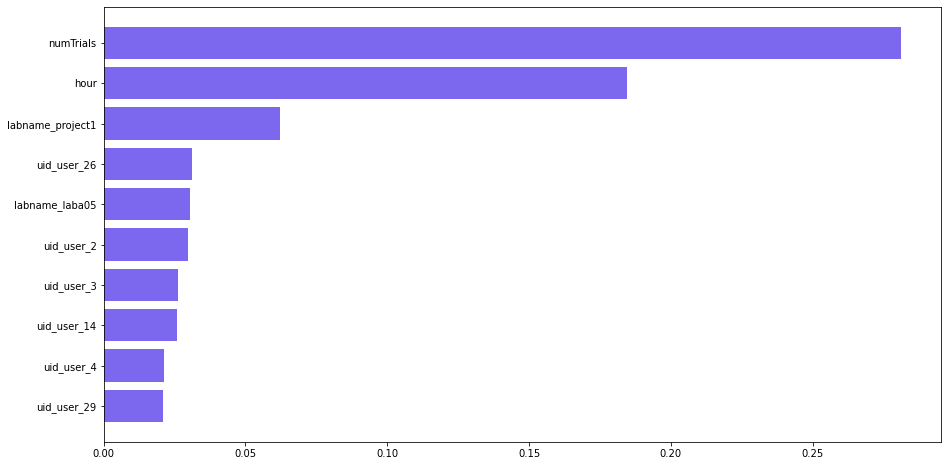

In [78]:
plot_feature_importances(model.feature_importances_, X.columns)

In [82]:
joblib.dump(model, 'best_model.joblib')

['best_model.joblib']

In [83]:
best_model = joblib.load('best_model.joblib')

In [84]:
y_pred = best_model.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.9230769230769231